<a href="https://colab.research.google.com/github/Kathryn-Hise/Physics-Articles-ML/blob/main/2_Loop_of_NaiveBayes_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import io
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving merged_table_better.csv to merged_table_better.csv


In [ ]:
#filename = 'only_tfidf (1).csv'
#filename = 'Metadata Reformatted & Validated - Sheet1 (1).csv'
filename = 'merged_table_better.csv'
#filename = 'metadata_and_tfidf_4.csv'
f = pd.read_csv(io.BytesIO(uploaded[filename]),encoding='unicode_escape')
# Dataset is now stored in a Pandas Dataframe

# Processing Array

In [ ]:
#display(f)

In [ ]:
#remove NaN values
f = f.dropna()

#turn into a numpy array
arr = f.to_numpy()
arr = np.delete(arr, 0, 0)
indexmark = len(arr[1])

In [ ]:
#change into feature categories
Y = arr[:,2]
Y = Y.astype(int)
#print(Y)
X = arr[:,-(indexmark - 3):]
X = X.astype(float)
#print(X)
#print(type(X[1][1]))

In [ ]:
#split the data into a 80/20 split

#print(type(X_train[1][4])) #check that its int

<Figure size 640x480 with 0 Axes>

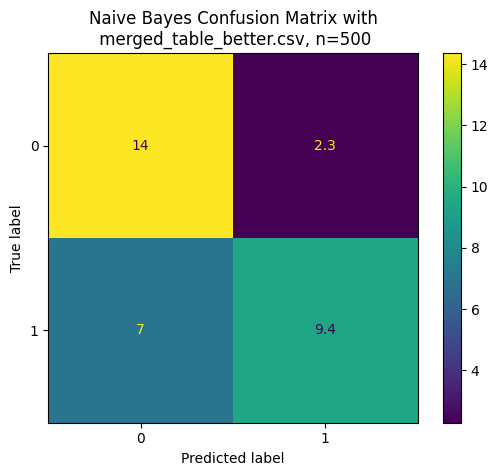

0.7188484848484848


In [ ]:
loopcount = 500
cnf_matrix = [[0,0],[0,0]]
cnf_sum = [[0,0],[0,0]]
for kjh in range(0,loopcount):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
  naiveb = GaussianNB()
  naiveb.fit(X_train, Y_train)

  cnf_matrix = confusion_matrix(Y_test, naiveb.predict(X_test))

  #calcuate the accuracy
  accuracy = 0
  for j in range(len(cnf_matrix)):
      accuracy += cnf_matrix[j][j]

  #print("Accuracy:",accuracy/len(Y_test))

  #ordered confusion matrix
  #print(confusion_matrix(Y_test, naiveb.predict(X_test)))#,labels=["L", "B", "R"]))
  cnf_matrix =  confusion_matrix(Y_test, naiveb.predict(X_test))
  cnf_sum = cnf_sum + cnf_matrix

  #print(naiveb.predict(X_test))

  #Prediction with probability
  #print(naiveb.predict_proba(X_test))

  #Saving the model for future uses
  joblib.dump(naiveb,'naive.pkl')

  #Re-use the model
  clf = joblib.load('naive.pkl')
  #print(clf.predict_proba(X_test))

cnf_sum = cnf_sum / loopcount
plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_sum)
disp.plot()
plt.title(f"Naive Bayes Confusion Matrix with\n {filename}, n={loopcount}")
plt.show()

print((cnf_sum[0,0]+cnf_sum[1,1]) / (cnf_sum[0,0]+cnf_sum[1,0]+cnf_sum[0,1]+cnf_sum[1,1]) )

# Training with Naive Bayes

In [ ]:
naiveb = GaussianNB()
naiveb.fit(X_train, Y_train)

cnf_matrix = confusion_matrix(Y_test, naiveb.predict(X_test))

#calcuate the accuracy
accuracy = 0
for j in range(len(cnf_matrix)):
    accuracy += cnf_matrix[j][j]

print("Accuracy:",accuracy/len(Y_test))

#ordered confusion matrix
print(confusion_matrix(Y_test, naiveb.predict(X_test)))#,labels=["L", "B", "R"]))

print(naiveb.predict(X_test))

#Prediction with probability
print(naiveb.predict_proba(X_test))

#Saving the model for future uses
import joblib
joblib.dump(naiveb,'naive.pkl')

#Re-use the model
clf = joblib.load('naive.pkl')
print(clf.predict_proba(X_test))

Accuracy: 0.8484848484848485
[[18  2]
 [ 3 10]]
[1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1]
[[4.56154362e-01 5.43845638e-01]
 [2.36057195e-02 9.76394280e-01]
 [2.34407789e-05 9.99976559e-01]
 [9.83787962e-01 1.62120377e-02]
 [7.33960358e-02 9.26603964e-01]
 [5.07930622e-01 4.92069378e-01]
 [8.69399892e-01 1.30600108e-01]
 [9.99999999e-01 9.65655283e-10]
 [9.99922133e-01 7.78666963e-05]
 [2.65682024e-03 9.97343180e-01]
 [7.74913639e-01 2.25086361e-01]
 [1.51874319e-20 1.00000000e+00]
 [5.35533701e-01 4.64466299e-01]
 [3.86507287e-01 6.13492713e-01]
 [9.99787410e-01 2.12589566e-04]
 [1.00000000e+00 5.03972679e-14]
 [1.00000000e+00 3.75826496e-30]
 [9.99999756e-01 2.44070309e-07]
 [9.99999733e-01 2.66767433e-07]
 [5.12958839e-13 1.00000000e+00]
 [8.65704948e-01 1.34295052e-01]
 [7.11900182e-01 2.88099818e-01]
 [9.97204714e-01 2.79528635e-03]
 [9.87187407e-01 1.28125931e-02]
 [9.52576181e-01 4.74238187e-02]
 [1.18874823e-05 9.99988113e-01]
 [9.99999967e-01 3.2704439

<Figure size 640x480 with 0 Axes>

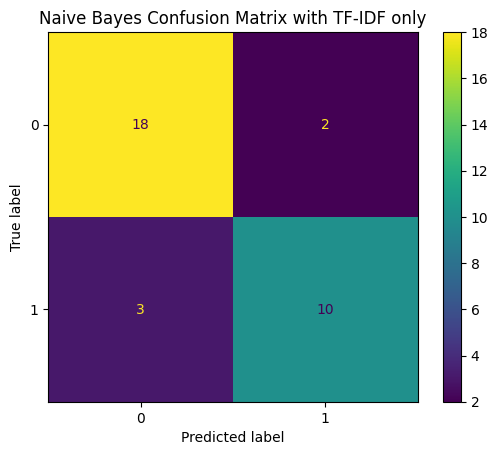

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
predictions = clf.predict(X_test)
#cm = confusion_matrix(Y_test, predictions)#, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
#print(neigh.predict_proba([[0.9]]))
#cm.stats() #return oredered Dictionary
#cm.stats()['overall']['Accuracy']
disp.plot()
plt.title("Naive Bayes Confusion Matrix with TF-IDF only")
plt.show()